# Learning objectives
- Can explore data on your own and load into python
- Can summarize single features
- Able to use indexing to compare two features

Loading in the data as previously... remember to check your working directory and if it matches where your `state_health.csv` file is!

In [2]:
import pandas as pd
states = pd.read_csv("state_health.csv")
states_named = states.set_index("State Name")

## Review on indexing
Indexing is how we clean and organize and access our data.

A **key** skill for the rest of the semester but can be tricky!

Suggestions:
- make a variable with a name like `rows` or `rows_in_bin` to store the rows you want to get. (Similar with columns)
- print out the first few entries in that variable
- instead of chaining together multiple data frame operations on one line like `lakes.sort_values('surface').head()...` put each one on a separate line storing them as separate variables after each operation. Then you can look at eacch one to see where you went wrong.

In [3]:
lakes = {'name':['Huron','Ontario','Michigan','Erie','Superior'],
        'surface':[23000, 7340,22400,9900,31700],
        'ave_depth':[195,284,279,70,480],
        'max_depth':[750,802,923,210,1333],
        'shared_canada':[True,True, False, True, True],
         'temperature':[48,51,49,54,43],
         'native_name':['Karegnondi','Oniatarí:io','Mich gami','Erielhonan','Gichi-gami']
        }
lakes = pd.DataFrame(lakes) 
lakes_named = lakes.set_index('name')

Write down an example of each of the following types of indexing using the `lakes_named` data frame. For each example 1) pick a specific example for each of the types then 2) write the code to implement it then 3) predict what it will give you before 4) running it .

**1**: Indexing to get the value in a certain cell (a certain row and a column)

Specific example of what you are trying to get:

**2**: Indexing to get the whole row or whole column for either a particular observation, or a particular feature

Specific example of what you are trying to get:

**3**: Indexing to get all observations where the feature values falling in a certain range.

Specific example of what you are trying to get:

**4**: Indexing to get the  just the 2nd and 3rd observations from of one feature

Specific example of what you are trying to get:

## 9. Univariate summaries

Review:
    
- a single feature can also be called a *variable*
- we can get the range of observations of the feature using univariate summaries (uni = 1, variate = about a variable): these functions operate on the **series** (in this case the Series is the column of the data frame containing the Poverty feature

In [4]:
min_poverty = states['Poverty'].min()
max_poverty = states['Poverty'].max()

print('lowest poverty: ', min_poverty)
print('highest poverty: ', max_poverty)

lowest poverty:  8.1
highest poverty:  19.0


Using these values, we created 9 bins. A bin is nothing special, just a way of cutting up the range of poverty values into categories like "very low","low","average",... but instead of these labels we use numbers.

We can create these bins using `linspace` from the `numpy` package. We specify we want a total of 10 numbers including the 2 endpoints:

In [5]:
import numpy as np
## np.linspace(low end, high end, how many bins)

poverty_bins = np.linspace(min_poverty, max_poverty, 10)
print(poverty_bins)

[ 8.1         9.31111111 10.52222222 11.73333333 12.94444444 14.15555556
 15.36666667 16.57777778 17.78888889 19.        ]


Let's get practice using Boolean indexing and create some summaries of our data.

We will count how many states fall in each bin. For example, if we wanted to find which states the per capita income is between $40,000 and $50,000, that range of values would be a bin. (How many states have incomes in that range).


**Exercise 9.0**: Pick one of your selected features from last week, besides poverty, get the minimum, the maximum, and make a range of 10 values going from minimum to maximum using `linspace`

**Exercise 9.1**: Given a variable `i` that can go between 0 and 8 (for the 9 bins) obtain the lower and upper bound of that bin. Store these into 2 variables `lower` and `upper` by filling in the code below:

In [6]:
lower = states_named['Per Capita Income'].min()
upper = states_named['Per Capita Income'].max()

**Exercise 9.2**: Use `lower` and `upper` to obtain how many observations fall into bin `i`

In [ ]:
pci_bins = np.linespace(lower, upper, 10)
number_obs = ## fill in

**Exercise 9.3**: Copy your code from 9.1 and 9.2 in a `for` loop that will to through values of `i` from 0 to 8 and print out how many states fall in each bin

In [ ]:
for i in range(9):
    lower = capita_bin[i]
    upper = capita_bin[i + 1]
    obs = (states_named['Per Capita Income'] >= lower) & (states_named['Per Capita Income'] <= upper)
    states_in_bin = states_named.loc[obs, 'Per Capita Income']
    number_obs = len(states_in_bin)
    print(number_obs)

**Exercise 9.4**: Now, copy your code from 9.3 and have it just print but *store* the counts for each bin. 

In [ ]:
d = {}
for i in range(9):
    lower = capita_bin[i]
    upper = capita_bin[i + 1]
    obs = (states_named['Per Capita Income'] >= lower) & (states_named['Per Capita Income'] <= upper)
    states_in_bin = states_named.loc[obs, 'Per Capita Income']
    number_obs = len(states_in_bin)
    print(number_obs)
    d[lower] = number_obs
d

**Exercise 9.5**: Write down the algorithm to start from the *observations* for a particular *feature*, that will create evenly spaced bins, and store for every bin, the number of states that fall in that bin 
- what are the main tasks?
- what are the steps in each task?
- it is OK to write down some code in your algorithm but your algorithm shoud be mostly English.

In [25]:
min_income = states['Per Capita Income'].min()
max_income = states['Per Capita Income'].max()
print(max_income)
print(min_income)
capita_bin = np.linspace(min_income, max_income, 10)

d = {}
for i in range(9):
    lower = capita_bin[i]
    upper = capita_bin[i + 1]
    obs = (states_named['Per Capita Income'] >= lower) & (states_named['Per Capita Income'] <= upper)
    states_in_bin = states_named.loc[obs, 'Per Capita Income']
    number_obs = len(states_in_bin)
    print(number_obs)
    d[lower] = number_obs
d

59808
25301
7
17
11
8
5
3
0
0
1


{25301.0: 7,
 29135.11111111111: 17,
 32969.22222222222: 11,
 36803.333333333336: 8,
 40637.444444444445: 5,
 44471.555555555555: 3,
 48305.66666666667: 0,
 52139.77777777778: 0,
 55973.88888888889: 1}

# 10. Intro to plotting


Plots have 4 fundamental properties that vary:
- x-axis (horizontal space)
- y-axis (vertical space)
- markers / shapes
- colors

Each of these mean something for representing our data. Every time you look at a plot you should ask yourself:
- what does the x-axis mean
- what does the y-axis mean
- what do markers or shapes mean
- what do colors mean



We can use the `seaborn` package for making plots. Today we will learn about using this to make plots of single features.

First we use `import` to load the package, then we set it up...

In [1]:
import seaborn as sns
sns.set_theme()  ## the default theme with a grid

Seaborn always operates on a data frame. 

### 10.2 Bar plot
A bar plot simply plots for each observation in your data frame, the value of the feature.

Seaborn often operates like this:

<code>sns.<font color=green>plot type function</font>(
    data=<font color=green>your data frame here</font>, 
    x=<font color=green>what goes on x-axis</font>,
    y=<font color=green>what goes on y-axis</font>)</code>

<AxesSubplot:xlabel='name', ylabel='surface'>

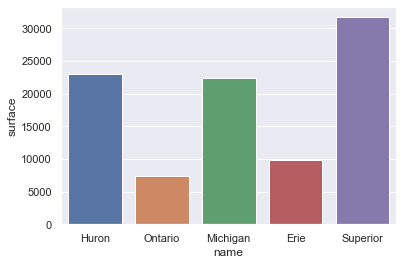

In [8]:
sns.barplot(       ## type = bar plot
    data = lakes,  ## lakes data frame
    x = 'name',    ## putting lake name on x
    y='surface')

Note that this is the same deal but reversed axes

<AxesSubplot:xlabel='temperature', ylabel='name'>

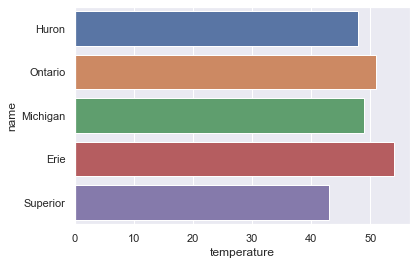

In [34]:
sns.barplot(data = lakes, y = 'name',x='temperature')

**Exercise 10.1.1**: Make a bar plot of the top or bottom 20 states for the observation you picked above. States should be sorted by their value of that feature.

In [2]:
d = {}
for i in range(9):
    lower = capita_bin[i]
    upper = capita_bin[i + 1]
    obs = (states_named['Per Capita Income'] >= lower) & (states_named['Per Capita Income'] <= upper)
    states_in_bin = states_named.loc[obs, 'Per Capita Income']
    number_obs = len(states_in_bin)
    print(number_obs)
    d[i] = number_obs

sort = states.sort_values('Per Capita Income')
first_twenty = sort.head(20)
sns.barplot( data = states.sort_values('Per Capita Income'), y = 'State Name', x = 'Per Capita Income')

NameError: name 'capita_bin' is not defined

**Exercise 10.1.2**: What are the observations and features in your plot? What do the axes mean?

In [3]:
Obs = states['State Name']
Feature = states_named['Per Capita Income']
# <AxesSubplot:xlabel='Per Capita Income', ylabel='State Name'>

NameError: name 'states' is not defined

**Self-check**: Make a bar plot of the values of the feature you cchose for only states that fall into one of your bins above, with states on the y-axis. What do you expect the x-axis range to be? Is it what you expected? Is the number of states in your plot what you expected?

<AxesSubplot:xlabel='Per Capita Income', ylabel='State Name'>

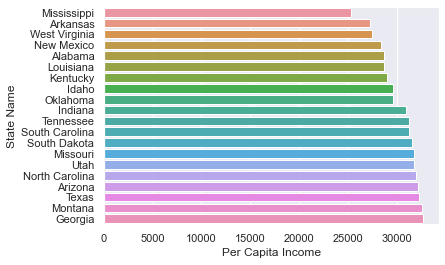

In [16]:
d = {}
for i in range(9):
    lower = capita_bin[i]
    upper = capita_bin[i + 1]
    obs = (states_named['Per Capita Income'] >= lower) & (states_named['Per Capita Income'] <= upper)
    states_in_bin = states_named.loc[obs, 'Per Capita Income']
    d[i] = states_in_bin

sort = states.sort_values('Per Capita Income')
first_twenty = sort.head(20)
sns.barplot( data = first_twenty, y = 'State Name', x = 'Per Capita Income')



### 10.2 Histogram

One useful summary is the **histogram** which allows us to visualize the **distribution** of our data. The distribution means *how many times (how frequently)* your *observations* have values falling in certain bins. This can provide some insight! 

Here's a plot from a [published paper](https://idpjournal.biomedcentral.com/articles/10.1186/s40249-021-00901-9) (note data is a NOT available  ☹️  )
![](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs40249-021-00901-9/MediaObjects/40249_2021_901_Fig4_HTML.png "covid")

**Discuss**: Look at the histogram above. 
- what are the *axes*?
- what do the *bars* mean?
- what *observations* and *features* are in this plot?
- what are the bins?

Depending on what seaborn function you use, it will make a different kind of plot. Right now we'll just use `displot` short for **distribution plot** which is the same thing as a histogram.

123123


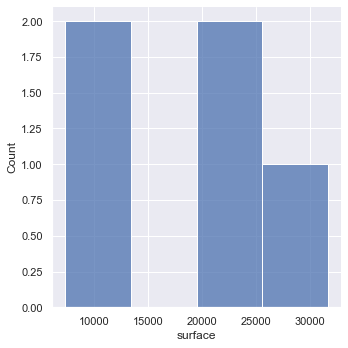

In [22]:
print(int(round(123123.12312313, 0)))
sns.displot(data=lakes, x="surface")

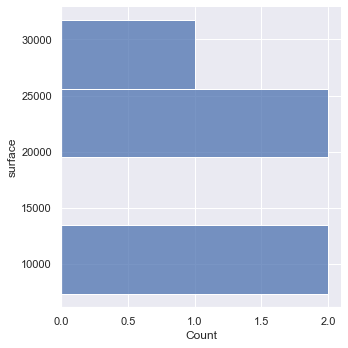

In [23]:
sns.displot(data=lakes, y="surface")

**Discuss**: Note that you only specify one of `x` or `y`. Why?

**Exercise 10.2.1**: *A*: Make a histogram (or distribution plot) of your chosen feature from exercise 9.0 to 9.5. 

In [4]:
sns.displot(data= states_named, x = "Per Capita Income")
#sns.barplot(data= d, x=list(d.keys()), y=list(d.values()))

#print(list(d.keys()))
print(d)

NameError: name 'states_named' is not defined

**Exercise 10.2.2**: Look at your histogram and compare the results to 1) The bin counts you got in exercise 9.0-9.5 and 2) the following functions on the series: `min()`, `max()`, `mean()`, and `median()`

In [ ]:
print(states_named['Per Capita Income'].min())
print(states_named['Per Capita Income'].max())
print(states_named['Per Capita Income'].mean())

**Exercise 10.2.3**: *A*: Use `describe()` for another feature. Then, predict (draw) what you think the histogram will look like using the whiteboard. Predict first:

count    52.000000
mean      9.282692
std       2.331853
min       5.100000
25%       7.550000
50%       8.850000
75%      10.825000
max      14.600000
Name: Mental illness, dtype: float64


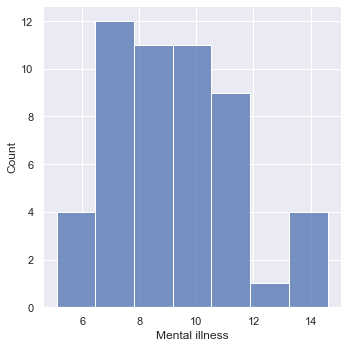

In [35]:
print(states_named["Mental illness"].describe())
sns.displot(data= states_named, x= "Mental illness")

*B*: Then, make the histogram. How does it compare to what you predicted?

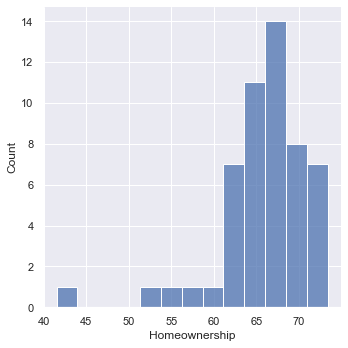

**Exercise 10.2.4**: *A*. Make a histogram of a 3rd of your chosen features. Then use the histogram to predict by looking at it what the values you will get are for `mean()`, `min()`, `max()`. 

41.5
73.4
65.79807692307692


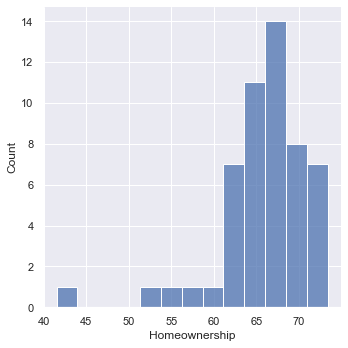

In [38]:
sns.displot(data=states,x='Homeownership')
print(states_named['Homeownership'].min())
print(states_named['Homeownership'].max())
print(states_named['Homeownership'].mean())

*B*. Then calculate the actual values after predicting. Do they match?

**Discuss**: What is the difference between a bar plot and a histogram? What is the same about a bar plot and a histogram?

**Self-check**: Look at your last histogram. A histogram creates bins of values for a feature. Eye-ball what you think the edges of one of the bins is, and predict how many states will fall in that bin. Verify this matches the data by getting the number of states that do fall into that bin using pandas. 

### 10.3 Practicing with data
Go to the Organization for Economic Cooperation and Development [website](https://data.oecd.org/earnwage/gender-wage-gap.htm) and download their data on the gender wage gap by country. "Selected data only".

**10.3.1**: Load the data into this jupyter notebook.

In [39]:
import pandas as pd
wage_gap = pd.read_csv('DP_LIVE_05102022201149114.csv')
#wage_gap = set_index

    LOCATION INDICATOR   SUBJECT MEASURE FREQUENCY  TIME      Value  \
0        AUS   WAGEGAP  EMPLOYEE      PC         A  2017  13.000948   
1        AUS   WAGEGAP  EMPLOYEE      PC         A  2018  13.448567   
2        AUS   WAGEGAP  EMPLOYEE      PC         A  2019  15.311653   
3        AUT   WAGEGAP  EMPLOYEE      PC         A  2017  15.382154   
4        AUT   WAGEGAP  EMPLOYEE      PC         A  2018  14.876691   
..       ...       ...       ...     ...       ...   ...        ...   
140      BRA   WAGEGAP  EMPLOYEE      PC         A  2017  13.333333   
141      BRA   WAGEGAP  EMPLOYEE      PC         A  2018  10.666667   
142      BRA   WAGEGAP  EMPLOYEE      PC         A  2019   6.666667   
143      BRA   WAGEGAP  EMPLOYEE      PC         A  2020   6.250000   
144      BRA   WAGEGAP  EMPLOYEE      PC         A  2021   9.090909   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
140         NaN  
141

**10.3.2**: Then get the subset corresponding to year 2021.

In [42]:
wage21 = wage_gap.loc[wage_gap['TIME'] == 2021]
wage21

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
14,CAN,WAGEGAP,EMPLOYEE,PC,A,2021,16.666667,NaN
19,CZE,WAGEGAP,EMPLOYEE,PC,A,2021,11.518748,NaN
47,JPN,WAGEGAP,EMPLOYEE,PC,A,2021,22.113766,NaN
52,KOR,WAGEGAP,EMPLOYEE,PC,A,2021,31.064839,NaN
55,MEX,WAGEGAP,EMPLOYEE,PC,A,2021,12.500000,NaN
63,NZL,WAGEGAP,EMPLOYEE,PC,A,2021,6.666667,NaN
68,NOR,WAGEGAP,EMPLOYEE,PC,A,2021,4.601479,NaN
78,SVK,WAGEGAP,EMPLOYEE,PC,A,2021,11.700371,NaN
92,GBR,WAGEGAP,EMPLOYEE,PC,A,2021,14.349294,NaN
97,USA,WAGEGAP,EMPLOYEE,PC,A,2021,16.864175,NaN


**10.3.2**: Make a bar plot of the wage gap for countries sorted by gap amount

<AxesSubplot:xlabel='LOCATION', ylabel='Value'>

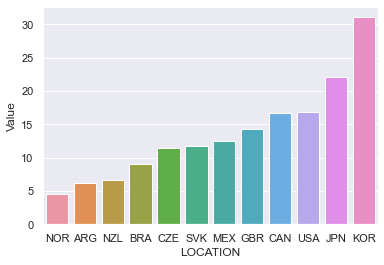

In [44]:
sns.barplot(data= wage21.sort_values('Value'), x= "LOCATION", y= "Value")


**10.3.3**: Using the bar plot, what do you think the mean, min, and max gaps are?

In [45]:
# min = 5
# max = 32
# Mean = 13.5

print(wage21["Value"].describe())

count    12.000000
mean     13.615576
std       7.450880
min       4.601479
25%       8.484848
50%      12.100186
75%      16.716044
max      31.064839
Name: Value, dtype: float64


**10.3.4**: Predict what the histogram will look like. Then make a histogram of the wage gaps. 

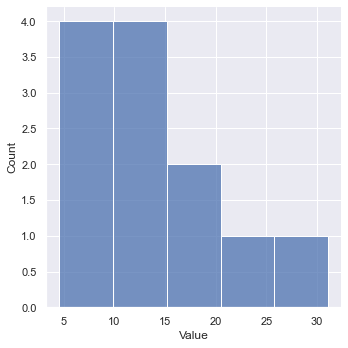

In [46]:
sns.displot(data= wage21, x="Value")

## 11. Reading in data sets that combine multiple data frames & cleaning your data
I uploaded some data to the "in_class" OneDrive folder. You can also get it at this [link](https://studentuml-my.sharepoint.com/:u:/g/personal/rachel_melamed_uml_edu/EUobuX9xTDxPsd0xKwHy0mkBOaImNzDBe64fHvAMrGBL2A?e=86aKPI)

The data is downloaded from [White, 2019, *Regional influences on community structure across the tropical-temperate divide*](https://www.nature.com/articles/s41467-019-10253-6) as detailed [here](https://github.com/kkdey/ecostructure/tree/master/data)

**Exercise 11.1**: It is in text files. Take a look in command line:
- how many lines are they?
- what's in the first few lines?
- How do you think the files relate to each other (feel free to check the links)

**Exercise 11.2**: *A*. Load them into 2 data frames, `sites` (eco_sites.txt) and `counts` (species_counts.txt)

In [6]:
import pandas as pd
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
#print(sites.head(3), counts.head(3))

    Elevation      North       East WorE
A2     198.25  26.978983  92.921975    E
A3     734.25  27.006267  92.404575    E
A4    1243.25  27.027496  92.410408    E     Macropygia_unchall  Streptopelia_chinensis  Streptopelia_senegalensis  \
A2                   0                       0                          0   
A3                   0                       0                          0   
A4                   0                       0                          0   

    Columba_pulchricollis  Streptopelia_orientalis  Chalcophaps_indica  \
A2                      0                        0                   0   
A3                      0                        0                   0   
A4                      0                        0                   0   

    Treron_curvirostra  Treron_apicauda  Treron_sphenurus  \
A2                   2                0                 0   
A3                   0                2                 0   
A4                   0                2        

**Exercise 11.3**: Check the sizes of each data frame and look at the first few rows

In [7]:
print(sites.shape)
print(counts.shape)

(38, 4)
(38, 304)


### 11.1 Reading the documentation
The info on python and pandas doesn't have man pages like command line but there's lots of info online- here is the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html) for `pd.read_table()` -- please always look at the version number to make sure it's not way off! unfortunately Python and its packages change a bit between versions.

You can see there are MANY ways to change how you are reading the DataFrame, because there are so many, we use **named arguments**.


In [50]:
pd.__version__

'1.4.2'

**Exercise 11.1.1**: Change how you read in the eco_sites so you read only the first 5 rows, save that into a variable `five_sites`.

In [8]:
five_sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt", nrows=5)
print(five_sites)

    Elevation      North       East WorE
A2     198.25  26.978983  92.921975    E
A3     734.25  27.006267  92.404575    E
A4    1243.25  27.027496  92.410408    E
A6    2629.00  27.147733  92.459379    E
A7    2340.25  27.091979  92.408567    E


**Exercise 11.1.2**: Make a histogram of the elevations of the sites in the East and the sites in the West ('WorE' column)

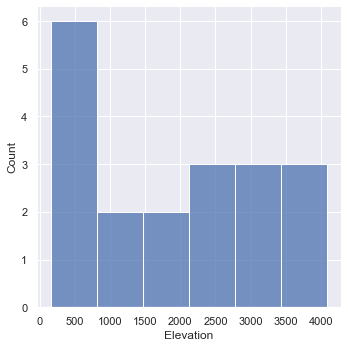

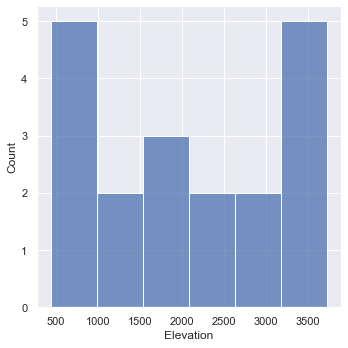

In [9]:
sns.displot(data= sites[sites['WorE'] == "E"], x = "Elevation" )
sns.displot(data= sites[sites['WorE'] == "W"], x = "Elevation" )

Let's look at some Arabidopsis data from the MAGIC study ([downloaded from here](https://github.com/rqtl/qtl2data/tree/main/ArabMAGIC)), data published [here](https://academic.oup.com/genetics/article/198/4/1751/5935984) 

Here's an Arabidopsis:

![arab](https://www.arabidopsis.org/images/arabi_bw1tr.gif "arabidopsis")

**Exercise 11.2** Use command line first to explore the data in the arabmagic directory. What kind of command line summaries of the data can we do?

In [12]:
pwd

'/Users/gcrowell/Library/CloudStorage/OneDrive-Personal/Desktop/School Shit/Fall 2022/ds4bio/Jupyter_Notebook'

In [ ]:
arabmagic_pheno

In [16]:
geno = pd.read_csv("arabidopsis_birds/arabmagic/arabmagic_geno.csv", skiprows= 3)
pheno = pd.read_csv("arabidopsis_birds/arabmagic/arabmagic_pheno.csv", skiprows= 3)
pmap = pd.read_csv("arabidopsis_birds/arabmagic/arabmagic_pmap_tair9.csv", skiprows= 3)
geno.set_index('marker', inplace = True)
pheno.set_index('id', inplace = True)
pmap.set_index('marker', inplace = True)


**Exercise 11.3** Then look through the documentation to figure out how to load in `arabmagic_geno.csv` using named arguments so your resulting data frame called `geno` has index with names like `MN1_29291` and columns with names like `MAGIC.1`

**Exercise 11.4** Load in `arabmagic_pheno.csv` to a data frame called `pheno` so that the rows are named `MAGIC.1` etc. Load  `arabmagic_pmap_tair9.csv` to a data frame called `pmap`, with row names  `MN1_29291` etc.

Note that pandas `read_csv` is `read_table(delimiter=",")`. We'll just stick to `read_table` in case people find it confusing but feel free to use either.

**Exercise 11.3** Look through the 3 resulting data frames and the links above about the data. It's pretty common for your data to come not fully explained. What do you think this data is?  What are the observations and features? Is there any metadata?

**Exercise 11.4**: Find out what the unique chromosomes are in Arabidopsis.

## 12. Visualizing and summarizing *categorical* and *binary* variables

Unlike most of our data, 'WorE' is two categories. 

We can summarize data that falls into categories easily by doing operations on Boolean Series.
 

In [107]:
lakes['surface']

0    23000
1     7340
2    22400
3     9900
4    31700
Name: surface, dtype: int64

In [109]:
smaller_lakes = lakes['surface'] < 20000
smaller_lakes

0    False
1     True
2    False
3     True
4    False
Name: surface, dtype: bool

In [110]:
smaller_lakes.sum()

2

In [111]:
smaller_lakes.mean()

0.4

**Exercise 12.1**: Find out how many sites are in the E region and in the W region.

In [17]:
(sites['WorE'] == 'E').sum()

19

In [19]:
(sites['WorE'] == 'W').sum()

19

The `displot` works also for non-number data. 

**Exercise 12.2**: Predict what your histogram of the the number of sites in each region should look like. Then make a histogram of the number of sites in each region.

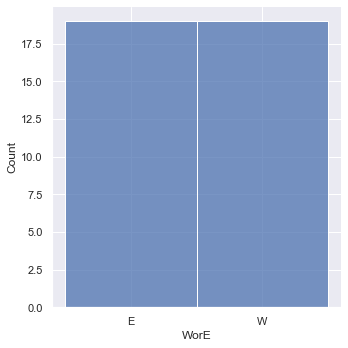

In [20]:
sns.displot(data= sites, x = "WorE" )
# two blocks of 19

**Exercise 12.3**: Find out the *number of markers* on chromosome 2 and the *fraction of markers* on chromsome 2.

**Exercise 12.4**: Make a histogram of the number of markers on each chromosome.  Compare this to the numbers you just got. 